In [12]:
#The example of decision tree model with c5.0
library(openxlsx)
library(C50)
dataset <- read.xlsx("https://academy.dqlab.id/dataset/credit_scoring_dqlab.xlsx")
dataset$risk_rating <- as.factor(dataset$risk_rating)
drop_column <- c("pendapatan_setahun_sejuta","kpr_aktif","rata_rata_overdue","risk_rating")
datafeed <-dataset[,!(names(datafeed) %in% drop_column)]
model <- C5.0(datafeed,as.factor(dataset$risk_rating))
summary(model)


Call:
C5.0.default(x = datafeed, y = as.factor(dataset$risk_rating))


C5.0 [Release 2.07 GPL Edition]  	Tue Oct 13 20:41:57 2020
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (5 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...pendapatan_setahun_juta > 244: 4 (60/1)
:   pendapatan_setahun_juta <= 244:
:   :...durasi_pinjaman_bulan > 24: 5 (106/22)
:       durasi_pinjaman_bulan <= 24:
:       :...pendapatan_setahun_juta > 192: 4 (24/2)
:           pendapatan_setahun_juta <= 192:
:           :...pendapatan_setahun_juta <= 98: 2 (4/2)
:               pendapatan_setahun_juta > 98: 4 (58/24)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (246/22)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (41/8)
        :   jumlah_tanggungan > 0: 3 (67/4)
        durasi_pinjaman_bulan <= 36:
        :...pendapatan_setahun_juta > 201: 1 (57)
            pendapatan_setahun_ju

<img src="Images/Decision_tree.png" width=1000>
Image Source = www.dqlab.id

# Step by step

In [25]:
#Changing the data type of class variable
dataset <- read.xlsx("https://academy.dqlab.id/dataset/credit_scoring_dqlab.xlsx")
dataset$risk_rating <- as.factor(dataset$risk_rating)

In [26]:
#Data preparation for input variables
input_column <- c("jumlah_tanggungan","durasi_pinjaman_bulan")
datafeed <- dataset[,input_column]
names(datafeed)

[1] "jumlah_tanggungan"     "durasi_pinjaman_bulan"

In [27]:
#Creating training and testing dataset
set.seed(100)
index <- sample(900,800)
training_input <- datafeed[index,]
training_class <- dataset[index,]$risk_rating
testing_input <- datafeed[-index,]

In [17]:
#Applicating training and class variables on the model
model <- C5.0(training_input,training_class)
summary(model)


Call:
C5.0.default(x = training_input, y = training_class)


C5.0 [Release 2.07 GPL Edition]  	Tue Oct 13 21:13:25 2020
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (105/30)
:   durasi_pinjaman_bulan > 24: 5 (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (37/7)
            jumlah_tanggungan > 0: 3 (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   184     2     5     6     6    (a): class 1
	    80    30    19     6    11    (b): class 2
	           3   250                (c): class 3
	

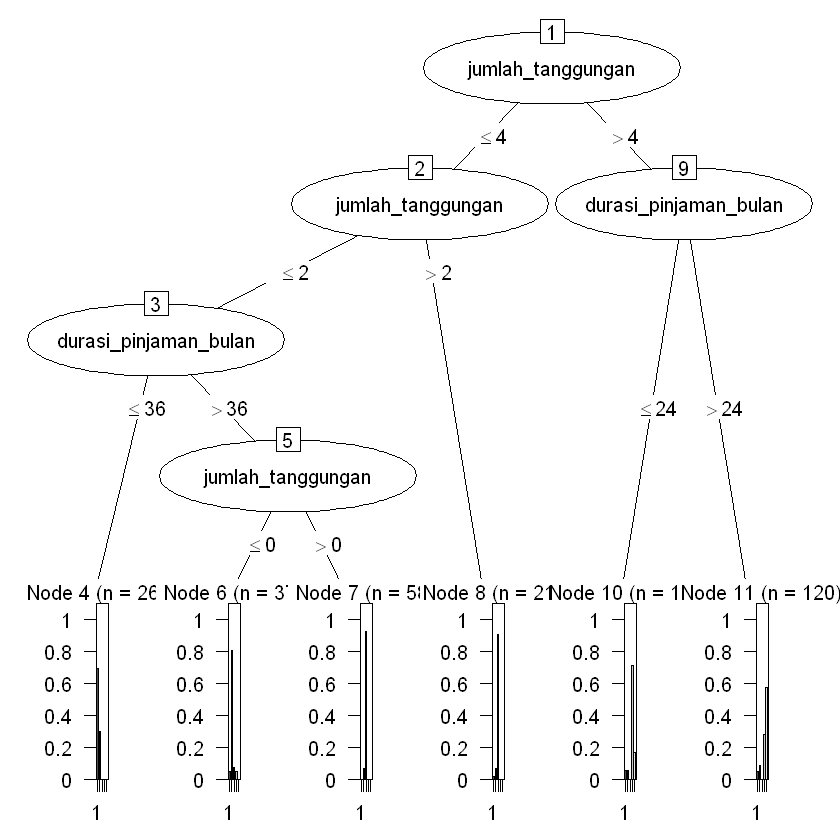

In [20]:
#Plotting the model
plot(model)

In [28]:
#Labelling control class on model summary
model <- C5.0(training_input,training_class,control=C5.0Control(label="Risk_Rating"))
summary(model)


Call:
C5.0.default(x = training_input, y = training_class, control
 = C5.0Control(label = "Risk_Rating"))


C5.0 [Release 2.07 GPL Edition]  	Tue Oct 13 22:08:30 2020
-------------------------------

Class specified by attribute `Risk_Rating'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (105/30)
:   durasi_pinjaman_bulan > 24: 5 (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (37/7)
            jumlah_tanggungan > 0: 3 (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   184     2     5     6     6    (a): class 1
	    80    30    19     6    11    (b): class 

In [23]:
#Changing class variables label for easier understanding
dataset <- read.xlsx("https://academy.dqlab.id/dataset/credit_scoring_dqlab.xlsx")
dataset$risk_rating[dataset$risk_rating==1] <- "satu"
dataset$risk_rating[dataset$risk_rating==2] <- "dua"
dataset$risk_rating[dataset$risk_rating==3] <- "tiga"
dataset$risk_rating[dataset$risk_rating==4] <- "empat"
dataset$risk_rating[dataset$risk_rating==5] <- "lima"
dataset$risk_rating <- as.factor(dataset$risk_rating)
input_column <- c("jumlah_tanggungan","durasi_pinjaman_bulan")
datafeed <- dataset[,input_column]
names(datafeed)
set.seed(100)
index <- sample(900,800)
training_input <- datafeed[index,]
training_class <- dataset[index,]$risk_rating
testing_input <- datafeed[-index,]
model <- C5.0(training_input,training_class,control=C5.0Control(label="Risk_Rating"))
summary(model)

[1] "jumlah_tanggungan"     "durasi_pinjaman_bulan"


Call:
C5.0.default(x = training_input, y = training_class, control
 = C5.0Control(label = "Risk_Rating"))


C5.0 [Release 2.07 GPL Edition]  	Tue Oct 13 21:39:59 2020
-------------------------------

Class specified by attribute `Risk_Rating'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: empat (105/30)
:   durasi_pinjaman_bulan > 24: lima (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: tiga (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: satu (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: dua (37/7)
            jumlah_tanggungan > 0: tiga (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	    30     6    11    80    19    (a): class dua
	     2    75    34       

In [24]:
#Using predict function
predict(model,testing_input)

[1] satu  satu  tiga  tiga  lima  lima  satu  satu  satu  tiga  satu  dua  
 [13] satu  satu  tiga  tiga  satu  tiga  tiga  tiga  tiga  tiga  satu  lima 
 [25] satu  satu  tiga  satu  tiga  lima  satu  satu  dua   satu  lima  satu 
 [37] satu  lima  tiga  tiga  tiga  tiga  empat tiga  tiga  satu  tiga  lima 
 [49] dua   tiga  dua   lima  tiga  lima  satu  lima  empat lima  tiga  empat
 [61] satu  tiga  empat empat tiga  lima  lima  lima  tiga  satu  satu  satu 
 [73] satu  tiga  lima  satu  empat lima  tiga  satu  tiga  tiga  tiga  tiga 
 [85] tiga  satu  tiga  tiga  lima  empat lima  tiga  tiga  tiga  satu  satu 
 [97] lima  lima  tiga  tiga 
Levels: dua empat lima satu tiga

In [29]:
#Merging prediction result
testing_input$final_result <- predict(model,testing_input)
testing_input$risk_rating <- dataset[-index,]$risk_rating
testing_input

,jumlah_tanggungan,durasi_pinjaman_bulan,final_result,risk_rating
3,0,12,1,1
5,0,36,1,2
8,3,48,3,2
40,3,36,3,2
41,6,48,5,2
44,5,48,5,2
58,0,12,1,1
70,0,12,1,1
109,0,12,1,1
110,4,12,3,3


In [32]:
#Comparing 'hasil_rating','risk_rating'
library(reshape2)
dcast(final_result ~ risk_rating,data=testing_input)

Using risk_rating as value column: use value.var to override.
Aggregation function missing: defaulting to length


final_result,1,2,3,4,5
1,24,6,0,0,0
2,0,3,1,0,0
3,0,2,37,0,0
4,0,0,0,7,0
5,0,2,0,2,16


In [37]:
#Finding correct prediction value
nrow(testing_input[testing_input$risk_rating==testing_input$final_result,])

[1] 87

In [38]:
#Finding incorrect prediction value
nrow(testing_input[testing_input$risk_rating!=testing_input$final_result,])

[1] 13

In [40]:
#Predicting new application on model
new_data <- data.frame(jumlah_tanggungan=c(3,5,1,2),durasi_pinjaman_bulan=c(10,5,60,64))
predict(model,new_data)

[1] 3 4 3 3
Levels: 1 2 3 4 5

### Learning Source : www.dqlab.id